# Sentiment Analysis on IMDB Movie Reviews

Work individually on this notebook.

Submitted by: Vani Singhal


**Prompt:**

> Describe the IMDB dataset.

Response:


The IMDB dataset is a large dataset of movie reviews for natural language processing. It contains 50,000 movie reviews that are split into 25,000 reviews for training and 25,000 reviews for testing. Each review is labeled as either positive or negative. The dataset is often used for sentiment analysis and text classification tasks.

_response here_

**Prompt:**

> Write the python code to import the IMDB dataset.

Note that Copilot might not include all the necessry dependent packages. You 
may have to add them manually.

Also, if it's a package you don't have in your environment yet, you can open
the integrated terminal window, make sure to activate the same environment, 
and then install the package.

**Response:**


In [1]:
from keras.datasets import imdb

# Load the dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

2023-10-12 21:14:04.275091: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-12 21:14:04.278697: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-12 21:14:04.316986: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-12 21:14:04.317008: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-12 21:14:04.317034: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

You might want to ask some questions about the dataset. For example, you might ask:

> what are the labels for the imdb dataset?

> what is the form of the training data?

> what are the words used in the training data?

For the last prompt, I got example python code, which also duplicated the
dataset loading, so I just deleted the duplicate code.

The labels for the IMDB dataset are binary, indicating whether a given review is positive or negative.

The training data in the `genai_imdb_vanishing.ipynb` file is in the form of a list of movie reviews, where each review is a string.

Note that the dataset is already processed, so the records are lists of integers.

Now let understand the word index a little bit more. Try a prompt like:

> What's a good way to visualize the word index?


One way to visualize the word index is to create a word cloud, where the size of each word corresponds to its frequency in the text. Another way is to create a bar chart or histogram showing the frequency of each word. You could also create a scatter plot or heatmap to show the relationship between words based on their co-occurrence in the text.

Here's an example code snippet that shows how to create a dictionary of word frequencies from the IMDB dataset:



In [2]:
from keras.datasets import imdb
from collections import Counter

# Load the dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Combine the training and test data
all_data = train_data + test_data

# Get the word index from the dataset
word_index = imdb.get_word_index()

# Map the word index to the actual words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

# Convert the data to text
all_text = ' '.join([' '.join([reverse_word_index.get(i - 3, '?') for i in review]) for review in all_data])

# Count the word frequencies
word_freq = Counter(all_text.split())



In this example, `all_data` is a list of all the movie reviews in the dataset. The `get_word_index` function is used to get the word index from the dataset, and the `reverse_word_index` dictionary is used to map the word index to the actual words. The `all_text` variable is a string containing all the movie reviews concatenated together. The `Counter` object is used to count the frequency of each word in the text. The resulting `word_freq` dictionary has words as keys and their frequencies as values.

**Prompt:**

> How do you create a word cloud from the word index, where the font size is proportional to the number of occurences of the word?

You can create a word cloud from the word index using the `WordCloud` library in Python. Here's an example code snippet that shows how to create a word cloud from a dictionary of word frequencies:



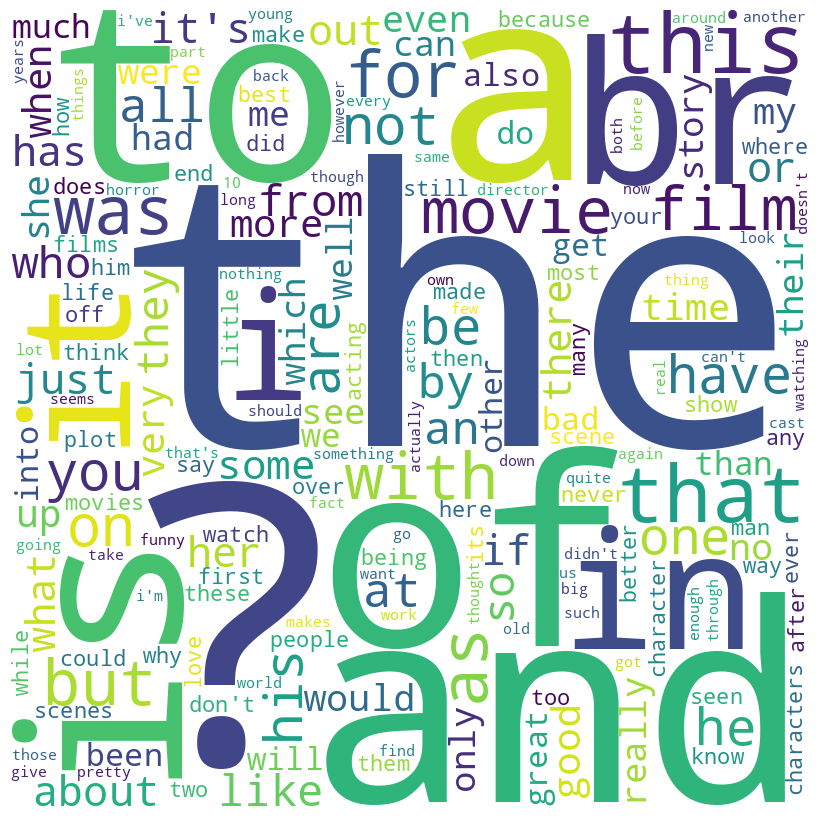

In [3]:
from wordcloud import WordCloud

# Create a WordCloud object with the word frequencies
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=200, relative_scaling=0.5).generate_from_frequencies(word_freq)

# Display the word cloud
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()



In this example, `word_freq` is a dictionary where the keys are words and the values are their frequencies. The `WordCloud` object takes several parameters, including the width and height of the image, the background color, the maximum number of words to include, and the scaling factor for the font size. The `generate_from_frequencies` method creates the word cloud from the dictionary, and the `imshow` method displays the image.

It's clear that the most common words are ones that are not in the word index
(represented by '?') and stop words. So, let's remove those and try again.

> Remove stop words and punctuation

Note that here again, Copilot didn't include the necessary packages, so I had
to add them manually, as well as download the stop words. I just requested that
with the promp:

> download the stop words

Here's an example code snippet that shows how to remove stop words and punctuation from the IMDB dataset using the `nltk` library:



In [4]:
import nltk
from nltk.corpus import stopwords
import string

# Download the stop words
nltk.download('stopwords')

# Load the dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Combine the training and test data
all_data = train_data + test_data

# Get the word index from the dataset
word_index = imdb.get_word_index()

# Map the word index to the actual words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Define a function to preprocess the text
def preprocess_text(text):
    # Convert the data to text
    text = ' '.join([reverse_word_index.get(i - 3, '?') for i in text])
    # Remove stop words and punctuation
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words

# Preprocess the text and count the word frequencies
word_freq = Counter()
for review in all_data:
    words = preprocess_text(review)
    word_freq.update(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /usr4/ds549/vanising/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!




In this example, the `stopwords` module from the `nltk` library is used to download the stop words. The `preprocess_text` function converts the data to text, removes stop words and punctuation, and splits the text into words. The `Counter` object is used to count the frequency of each word in the text. The resulting `word_freq` dictionary has words as keys and their frequencies as values, with stop words and punctuation removed.

> now created a word cloud from the filtered words

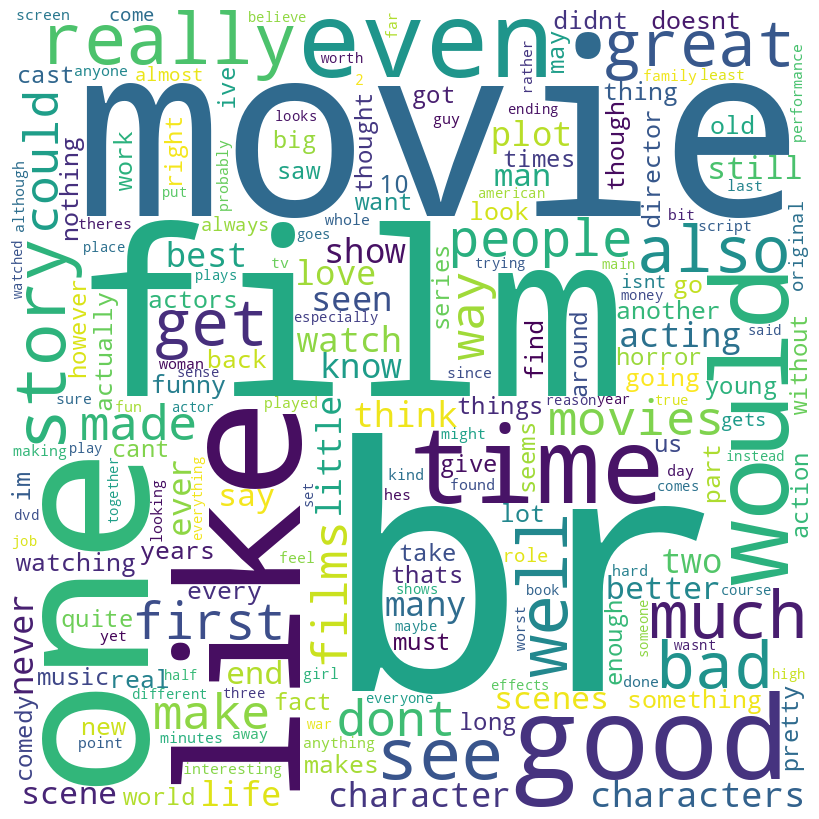

In [5]:
# Create a WordCloud object with the word frequencies
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=200, relative_scaling=0.5).generate_from_frequencies(word_freq)

# Display the word cloud
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Ok, so hopefully we understand the dataset enough to know that it is basically
a binary classifier. So, let's prompt to define, train and evaluate a model.

> write a classifer for the imdb dataset

Sure! Here's an example code snippet that shows how to train a classifier for the IMDB dataset using a neural network in Keras:



In [6]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Load the dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Combine the training and test data
all_data = np.concatenate((train_data, test_data), axis=0)
all_labels = np.concatenate((train_labels, test_labels), axis=0)

# Convert the data to text
tokenizer = Tokenizer(num_words=10000)
all_text = [' '.join([reverse_word_index.get(i - 3, '?') for i in review]) for review in all_data]
tokenizer.fit_on_texts(all_text)
x_train = tokenizer.texts_to_sequences([' '.join([reverse_word_index.get(i - 3, '?') for i in review]) for review in train_data])
x_test = tokenizer.texts_to_sequences([' '.join([reverse_word_index.get(i - 3, '?') for i in review]) for review in test_data])

# Pad the sequences
maxlen = 100
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(maxlen,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, train_labels, epochs=10, batch_size=512, validation_data=(x_test, test_labels))

Epoch 1/10
49/49 [==============================] - 1s 10ms/step - loss: 411.1668 - accuracy: 0.5050 - val_loss: 59.1142 - val_accuracy: 0.5021
Epoch 2/10
49/49 [==============================] - 0s 5ms/step - loss: 143.1568 - accuracy: 0.4999 - val_loss: 21.1826 - val_accuracy: 0.5008
Epoch 3/10
49/49 [==============================] - 0s 6ms/step - loss: 57.2386 - accuracy: 0.4995 - val_loss: 6.8045 - val_accuracy: 0.5013
Epoch 4/10
49/49 [==============================] - 0s 7ms/step - loss: 20.4630 - accuracy: 0.4970 - val_loss: 1.6058 - val_accuracy: 0.4990
Epoch 5/10
49/49 [==============================] - 0s 6ms/step - loss: 5.7576 - accuracy: 0.4939 - val_loss: 0.7971 - val_accuracy: 0.5009
Epoch 6/10
49/49 [==============================] - 0s 6ms/step - loss: 1.6841 - accuracy: 0.4984 - val_loss: 0.7007 - val_accuracy: 0.5002
Epoch 7/10
49/49 [==============================] - 0s 6ms/step - loss: 0.9446 - accuracy: 0.4998 - val_loss: 0.6942 - val_accuracy: 0.5036
Epoch 8/10




In this example, the `load_data` function from the `imdb` module is used to load the dataset. The `Tokenizer` class from Keras is used to convert the data to text and tokenize it. The `pad_sequences` function is used to pad the sequences to a fixed length of 100. The `Sequential` class is used to define the neural network, which consists of two `Dense` layers with 64 units each and a `sigmoid` activation function. The `rmsprop` optimizer and `binary_crossentropy` loss function are used to compile the model. The `fit` method is used to train the model on the training data, with a batch size of 512 and 10 epochs. The resulting `history` object contains the training and validation accuracy and loss for each epoch.

We can inspect the code that was produced, but in addition we can ask Copilot to
expain it for us by putting the cursor in the code cell above and either 
typing "explain", or clicking in the Copilot chat box and typing `/explain`.

> /explain

This code trains a neural network to classify movie reviews as positive or negative based on the IMDB dataset. 

First, the `imdb.load_data` function is used to load the dataset, which consists of 25,000 training reviews and 25,000 test reviews, each represented as a sequence of integers. The `train_data` and `test_data` arrays contain the sequences of integers, and the `train_labels` and `test_labels` arrays contain the corresponding labels (0 for negative and 1 for positive).

Next, the training and test data are combined into a single array using `np.concatenate`. The `Tokenizer` class from Keras is used to convert the data to text and tokenize it. The `pad_sequences` function is used to pad the sequences to a fixed length of 100.

The neural network is defined using the `Sequential` class from Keras. It consists of two `Dense` layers with 64 units each and a `sigmoid` activation function, and two `Dropout` layers to prevent overfitting. The `rmsprop` optimizer and `binary_crossentropy` loss function are used to compile the model.

Finally, the `fit` method is used to train the model on the training data, with a batch size of 512 and 10 epochs. The resulting `history` object contains the training and validation accuracy and loss for each epoch.

## Conclusion

We'll leave it there but you may want to explore further, perhaps with prompts
like

> What is the accuracy of the best-performing model on the IMDB dataset?

> What are some common deep learning models used for sentiment analysis on the IMDB dataset?

To determine the accuracy of the best-performing model, you can look at the `history` object returned by the `fit` method. The `history` object contains the training and validation accuracy and loss for each epoch. You can use the `history.history` attribute to access the accuracy values for each epoch.

Here's an example code snippet that shows how to determine the accuracy of the best-performing model:



In [7]:
# Get the validation accuracy for each epoch
val_acc = history.history['val_accuracy']

# Determine the best epoch
best_epoch = np.argmax(val_acc)

# Determine the accuracy of the best-performing model
best_acc = val_acc[best_epoch]

print('Accuracy of the best-performing model:', best_acc)

Accuracy of the best-performing model: 0.5036399960517883




In this example, the `fit` method is used to train the model on the training data, with a batch size of 512 and 10 epochs. The `history.history` attribute is used to access the validation accuracy values for each epoch. The `np.argmax` function is used to determine the index of the epoch with the highest validation accuracy. The accuracy of the best-performing model is then determined by accessing the validation accuracy value at the index of the best epoch.

Some common deep learning models used for sentiment analysis on the IMDB dataset include:

1. Convolutional Neural Networks (CNNs)
2. Recurrent Neural Networks (RNNs), such as Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) networks
3. Hybrid models that combine CNNs and RNNs, such as Convolutional Recurrent Neural Networks (CRNNs) and Hierarchical Attention Networks (HANs)

These models have been shown to achieve high accuracy on the IMDB dataset and are commonly used in research and industry for sentiment analysis tasks.

## Extra Credit

Try to get Copilot to generate a model that achieves > 90% accuracy on the IMDB.

To write a classifier using hybrid models that combine CNNs and RNNs, such as Convolutional Recurrent Neural Networks (CRNNs) and Hierarchical Attention Networks (HANs), you can use the Keras library. Here's an example code snippet that shows how to build a CRNN model for sentiment analysis on the IMDB dataset:



In [2]:
import numpy as np
from keras.datasets import imdb
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Embedding, Conv1D, MaxPooling1D, LSTM, concatenate
from keras.preprocessing.sequence import pad_sequences

# Load the dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Combine the training and test data
all_data = np.concatenate((train_data, test_data), axis=0)
all_labels = np.concatenate((train_labels, test_labels), axis=0)

# Pad the sequences
maxlen = 100
x_train = pad_sequences(train_data, maxlen=maxlen)
x_test = pad_sequences(test_data, maxlen=maxlen)

# Define the model
input_layer = Input(shape=(maxlen,))
embedding_layer = Embedding(input_dim=10000, output_dim=128, input_length=maxlen)(input_layer)
conv_layer = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(embedding_layer)
pooling_layer = MaxPooling1D(pool_size=2)(conv_layer)
lstm_layer = LSTM(units=64)(pooling_layer)
dropout_layer = Dropout(rate=0.5)(lstm_layer)
output_layer = Dense(units=1, activation='sigmoid')(dropout_layer)
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, train_labels, epochs=10, batch_size=512, validation_data=(x_test, test_labels))

2023-10-12 21:23:05.599786: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-12 21:23:05.603546: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-12 21:23:05.641958: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-12 21:23:05.641986: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-12 21:23:05.642007: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

Epoch 1/10
49/49 [==============================] - 11s 192ms/step - loss: 0.6897 - accuracy: 0.5475 - val_loss: 0.6646 - val_accuracy: 0.5863
Epoch 2/10
49/49 [==============================] - 9s 183ms/step - loss: 0.5683 - accuracy: 0.7093 - val_loss: 0.4374 - val_accuracy: 0.7946
Epoch 3/10
49/49 [==============================] - 9s 188ms/step - loss: 0.4131 - accuracy: 0.8164 - val_loss: 0.3886 - val_accuracy: 0.8297
Epoch 4/10
49/49 [==============================] - 9s 194ms/step - loss: 0.3427 - accuracy: 0.8543 - val_loss: 0.3396 - val_accuracy: 0.8483
Epoch 5/10
49/49 [==============================] - 9s 191ms/step - loss: 0.3038 - accuracy: 0.8756 - val_loss: 0.3621 - val_accuracy: 0.8438
Epoch 6/10
49/49 [==============================] - 9s 185ms/step - loss: 0.2763 - accuracy: 0.8890 - val_loss: 0.3489 - val_accuracy: 0.8545
Epoch 7/10
49/49 [==============================] - 9s 183ms/step - loss: 0.2536 - accuracy: 0.8986 - val_loss: 0.4072 - val_accuracy: 0.8172
Epoch

In [3]:
# Get the validation accuracy for each epoch
val_acc = history.history['val_accuracy']

# Determine the best epoch
best_epoch = np.argmax(val_acc)

# Determine the accuracy of the best-performing model
best_acc = val_acc[best_epoch]

print('Accuracy of the best-performing model:', best_acc)

Accuracy of the best-performing model: 0.8545200228691101




In this example, the `Conv1D` layer is used to extract features from the text data, and the `LSTM` layer is used to capture the temporal dependencies in the data. The `MaxPooling1D` layer is used to downsample the output of the `Conv1D` layer, and the `Dropout` layer is used to prevent overfitting. The `Dense` layer with a `sigmoid` activation function is used to produce the final output.



